# Doublet

In [1]:
from IPython.core.display import HTML
def css_styling(filepath):
    styles = open(filepath, 'r').read()
    return HTML(styles)
css_styling('../styles/custom.css');

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

A doublet is basically a combination of a source and a sink. In the previous lesson notebook a source-sink pair was studied when added to a uniform flow, generating the so-called Rankine oval.

Let's assume that the source-sink is isolated from the uniform flow, so the streamline function reads

$$\psi(x, y) = \frac{\sigma}{2\pi} (\theta_1 - \theta_2) = \frac{\sigma}{2\pi} \Delta\theta,$$

with $\theta_1$ and $\theta_2$ the azimuthal coordinates of either the source or the sink, respectively.

Given a point $P(x, y)$ and the distance between the singularities $l$, the streamfunction can expressed as

$$\psi(x, y) = \lim \limits_{l \to 0} \left(-\frac{\sigma}{2\pi}d\theta\right), \quad \text{with} \quad \sigma l = \text{constant}.$$

From geometrical relations, one can express the angular coordinates of both singalurities from this of the reference frame, i.e.

$$d\theta = \frac{a}{b} = \frac{l\sin\theta}{r - l\cos\theta}.$$

This yields to the doublet streamfunction

$$\psi = -\frac{\kappa}{2\pi} \frac{\sin\theta}{r} = -\frac{\kappa}{2\pi} \frac{y}{x^2 + y^2},$$

from which the velocity field can be derived,

$$u = \frac{\partial\psi}{\partial y} =-\frac{\kappa}{2\pi} \frac{x - y}{(x^2 + y^2)^2}$$

$$v = -\frac{\partial\psi}{\partial x} =-\frac{\kappa}{2\pi} \frac{2xy}{(x^2 + y^2)^2},$$

These expressions can also be transtlated to cylindrical coordinates with the definition

$$u_r = \frac{1}{r}\frac{\partial\psi}{\partial\theta} = U_\infty\cos\theta\left(1 - \frac{R^2}{r^2} \right),$$
$$u_\theta = -\frac{\partial\psi}{\partial r} = -U_\infty\sin\theta \left(1 + \frac{R^2}{r^2} \right)$$,




Let's plot some examples

In [21]:
N = 50                                # Number of points in each direction
x_start, x_end = -2.0, 2.0            # x-direction boundaries
y_start, y_end = -1.0, 1.0            # y-direction boundaries
x = np.linspace(x_start, x_end, N)    # creates a 1D-array for x
y = np.linspace(y_start, y_end, N)    # creates a 1D-array for y
X, Y = np.meshgrid(x, y)              # generates a mesh grid

The strenght of the doublet will be fixed to $\kappa = 1.0$, and it will be located at the origin.

In [22]:
kappa = 1.0
x_doublet, y_doublet = 0.0, 0.0

Similar to what it was done in previous notebooks, a function computing the velocity from a doublet will be defined,

In [23]:
def get_velocity(kappa, x0, y0, X, Y):
    
    u = -kappa/(2*np.pi)*((X - x0)**2 - (Y - y0)**2)/((X - x0)**2 + (Y - y0)**2)**2
    v = -kappa/(2*np.pi)*2*(X - x0)*(Y - y0)/((X - x0)**2 + (Y - y0)**2)**2
    
    return u, v

and the corresponding function to calculate the streamfunction

In [24]:
def get_streamfunction(kappa, x0, y0, X, Y):
    
    psi = -kappa/(2*np.pi)*(Y - y0)/((X - x0)**2 + (Y - y0)**2)
    
    return psi

Once defined these functions, they will be tested with the following computations:

In [25]:
u_doublet, v_doublet = get_velocity(kappa, x_doublet, y_doublet, X, Y)
psi_doublet = get_streamfunction(kappa, x_doublet, y_doublet, X, Y)

A plot will be more explanatory

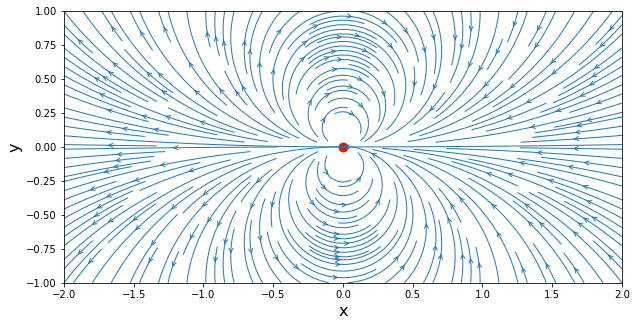

In [26]:
# plot the streamlines
width = 10
height = (y_end - y_start)/(x_end - x_start)*width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_doublet, v_doublet,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o');

## Uniform flow past a doublet

From the previous solution, and taking advantage of the superposition feature of potential flows, the doublet solution will be combined with this of a uniform flow $U_\infty = 1$.

In [27]:
u_inf = 1.0

From the previous lesson, the uniform flow has the following solutions

$$\psi = U_\infty y,$$
$$\phi = U_\infty x.$$

In [28]:
u_freestream = u_inf*np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

psi_freestream = u_inf*Y;

In [29]:
# superposition of the doublet on the freestream flow
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

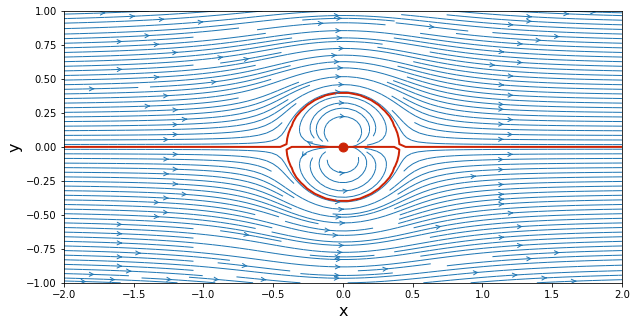

In [30]:
# plot the streamlines
width = 10
height = (y_end - y_start)/(x_end - x_start)*width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.contour(X, Y, psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
plt.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o');

### Challenge question
What is the radius of the circular cylinder created when a doublet of strength $\kappa$ is added to a uniform flow $U_\infty$ in the $x$-direction?